In [1]:
import numpy as np
import matplotlib
import os
import cv2
from skimage import io
from skimage import color, exposure, transform
from PIL import Image, ImageChops, ImageDraw, ImageOps, ImageFilter 
import imutils
import argparse
import ntpath
import sys
import matplotlib.pyplot as plt
import glob

In [2]:
def load_templates(directory):
    paths = []
    for files in os.listdir(directory):
        if (files != ".DS_Store"):
            paths.append(directory+'/'+files)
    return paths

In [3]:
def find_borders(img,pix):
    borders = []    
    for y in range(0,img.size[1]):
        found = False
        has_grey = False
        
        for x in range(1,img.size[0]):

            r = pix[x,y][0]
            g = pix[x,y][1]
            b = pix[x,y][2]
                
            prev_r = pix[x-1,y][0]
            prev_g = pix[x-1,y][1]
            prev_b = pix[x-1,y][2]
            
            r_g = abs(r-g)
            r_b = abs(r-b)
            g_b = abs(g-b)
            
            if (r_g<=15 and r_b<=15 and g_b<=15):
                has_grey = True

                
            if ((abs(prev_r-r)>=20) or (abs(prev_g-g)>=20) or (abs(prev_b-b)>=20)):
                    
                for i in range(0,x):
                    borders.append([i,y])
                found = True
                break   
            
        if ((not found)and(has_grey)):
            for i in range(0,img.size[0]-1):
                borders.append([i,y])  
              
        for x in range(img.size[0]-1,1,-1):
                
            r = pix[x,y][0]
            g = pix[x,y][1]
            b = pix[x,y][2]
                
            prev_r = pix[x-1,y][0]
            prev_g = pix[x-1,y][1]
            prev_b = pix[x-1,y][2]
                
            if ((abs(prev_r-r)>=20) or (abs(prev_g-g)>=20) or (abs(prev_b-b)>=20)):
                    
                for i in range(x,img.size[0]-1):
                    borders.append([i,y])
                break
                    
    return borders

In [4]:
def manipulate_images(paths):
    
    for image_path in paths:
        
        
        
        img = Image.open(image_path)
        pix = img.load()
        
        borders = find_borders(img,pix)
         
        
        image = cv2.imread(image_path, -1)
        
        b_channel, g_channel, r_channel = cv2.split(image)
        alpha_channel = np.ones(b_channel.shape, dtype=b_channel.dtype) * 255 #creating a dummy alpha channel image.
        image_RGBA = cv2.merge((b_channel, g_channel, r_channel, alpha_channel))
        
        height, width, channels = image.shape
        
        #Deleting white perimeter of shape
        for i in range(0,img.size[0]-1):
            image_RGBA[0,i][3] = 0
            image_RGBA[img.size[1]-1,i][3] = 0
        
        for i in range(0,img.size[1]-1):
            image_RGBA[i,0][3] = 0
            image_RGBA[i,img.size[0]-1][3] = 0
            
        
        
        for border in borders:
            image_RGBA[border[1],border[0]][3] = 0
            
        
        head, tail = ntpath.split(image_path)
        
        title,extension = tail.split('.')
        cv2.imwrite("Traffic_Signs_Templates/Processed_Images/"+title+".png", image_RGBA)
        
        
        

In [5]:
directory = 'Traffic_Signs_Templates/Images'
if (not os.path.exists("Traffic_Signs_Templates/Processed_Images")):
    os.mkdir("Traffic_Signs_Templates/Processed_Images")
paths = load_templates(directory)
manipulate_images(paths)

In [223]:
def img_transform(paths):
    
    for image_path in paths:
        
        img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        rows,cols,ch = img.shape
        t = []
        for i in range(1,100):
            t.append(i)
            
        
        
        #EAST FACING
        pts1 = np.float32([[cols/10,rows/10],[cols/2,rows/10],[cols/10,rows/2]])
        pts2 = np.float32([[cols/5,rows/5],[cols/2,rows/8],[cols/5,rows/1.8]])
        M = cv2.getAffineTransform(pts1,pts2)
        dst = cv2.warpAffine(img,M,(cols,rows))
        
        #NORTH-WEST FACING
        pts3 = np.float32([[cols*9/10,rows/10],[cols/2,rows/10],[cols*9/10,rows/2]])
        pts4 = np.float32([[cols*4.5/5,rows/5],[cols/2,rows/8],[cols*4.5/5,rows/1.8]])
        M = cv2.getAffineTransform(pts3,pts4)
        dst2 = cv2.warpAffine(img,M,(cols,rows))
        
        #LEFT TILTED FORWARD FACING
        pts5 = np.float32([[cols/10,rows/10],[cols/2,rows/10],[cols/10,rows/2]])
        pts6 = np.float32([[cols/12,rows/6],[cols/2.1,rows/8],[cols/10,rows/1.8]])
        M = cv2.getAffineTransform(pts5,pts6)
        dst3 = cv2.warpAffine(img,M,(cols,rows))
        
        #RIGHT TILTED FORWARD FACING
        pts7 = np.float32([[cols*9/10,rows/10],[cols/2,rows/10],[cols*9/10,rows/2]])
        pts8 = np.float32([[cols*10/12,rows/6],[cols/2.2,rows/8],[cols*8.4/10,rows/1.8]])
        M = cv2.getAffineTransform(pts7,pts8)
        dst4 = cv2.warpAffine(img,M,(cols,rows))
        
        #WEST FACING
        pts9 = np.float32([[cols/10,rows/10],[cols/2,rows/10],[cols*9/10,rows/2]])
        pts10 = np.float32([[cols/6,rows/7],[cols/2.2,rows/6],[cols*7/10,rows/1.8]])
        M = cv2.getAffineTransform(pts9,pts10)
        dst5 = cv2.warpAffine(img,M,(cols,rows))
        
        #RIGHT TILTED FORWARD FACING
        pts11 = np.float32([[cols*9/10,rows/10],[cols/2,rows/10],[cols*9/10,rows/2]])
        pts12 = np.float32([[cols*4/6,rows/6],[cols/2.8,rows/8],[cols*7/10,rows/1.8]])
        M = cv2.getAffineTransform(pts11,pts12)
        dst6 = cv2.warpAffine(img,M,(cols,rows))
        
        #FORWARD FACING W/ DISTORTION
        pts13 = np.float32([[cols/10,rows/10],[cols/2,rows/10],[cols*9/10,rows/2]])
        pts14 = np.float32([[cols/8,rows/6],[cols/2.5,rows/6.5],[cols*7/10,rows/1.95]])
        M = cv2.getAffineTransform(pts13,pts14)
        dst7 = cv2.warpAffine(img,M,(cols,rows))
        
        #FORWARD FACING W/ DISTORTION 2
        pts15 = np.float32([[cols*9/10,rows/10],[cols/2,rows/10],[cols*9/10,rows/2]])
        pts16 = np.float32([[cols*4/6,rows/6],[cols/2.5,rows/6.5],[cols*7/10,rows/1.95]])
        M = cv2.getAffineTransform(pts15,pts16)
        dst8 = cv2.warpAffine(img,M,(cols,rows))
        
        #FORWARD FACING W/ DISTORTION 3
        pts17 = np.float32([[cols*9/10,rows/10],[cols/2,rows/10],[cols*9/10,rows/2]])
        pts18 = np.float32([[cols*4.3/6,rows/6.5],[cols/2.4,rows/6.5],[cols*7/10,rows/1.95]])
        M = cv2.getAffineTransform(pts17,pts18)
        dst9 = cv2.warpAffine(img,M,(cols,rows))
        
        #FORWARD FACING W/ DISTORTION 3
        pts19 = np.float32([[cols*9/10,rows/10],[cols/2,rows/10],[cols*9/10,rows/2]])
        pts20 = np.float32([[cols*4.1/6,rows/6.5],[cols/2.65,rows/6.6],[cols*7.1/10,rows/2]])
        M = cv2.getAffineTransform(pts19,pts20)
        dst10 = cv2.warpAffine(img,M,(cols,rows))
        
        
        
        
        plt.imshow(dst10)
        
        
        head, tail = ntpath.split(image_path)
        
        title,extension = tail.split('.')
        
        
        cv2.imwrite("Traffic_Signs_Templates/Transformed_Images/"+title+"/"+str(t[0])+".png",dst)
        cv2.imwrite("Traffic_Signs_Templates/Transformed_Images/"+title+"/"+str(t[1])+".png",dst2)
        cv2.imwrite("Traffic_Signs_Templates/Transformed_Images/"+title+"/"+str(t[2])+".png",dst3)
        cv2.imwrite("Traffic_Signs_Templates/Transformed_Images/"+title+"/"+str(t[3])+".png",dst4)
        cv2.imwrite("Traffic_Signs_Templates/Transformed_Images/"+title+"/"+str(t[4])+".png",dst5)
        cv2.imwrite("Traffic_Signs_Templates/Transformed_Images/"+title+"/"+str(t[5])+".png",dst6)
        cv2.imwrite("Traffic_Signs_Templates/Transformed_Images/"+title+"/"+str(t[6])+".png",dst7)
        cv2.imwrite("Traffic_Signs_Templates/Transformed_Images/"+title+"/"+str(t[7])+".png",dst8)
        cv2.imwrite("Traffic_Signs_Templates/Transformed_Images/"+title+"/"+str(t[8])+".png",dst9)
        cv2.imwrite("Traffic_Signs_Templates/Transformed_Images/"+title+"/"+str(t[9])+".png",dst10)
        
        plt.show()
        
        

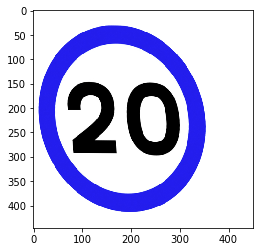

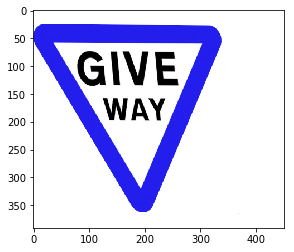

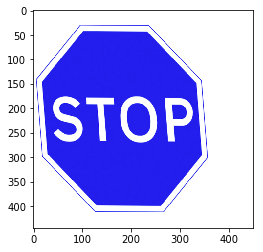

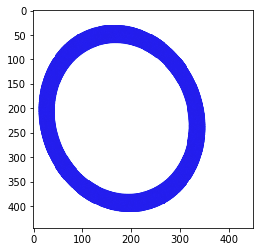

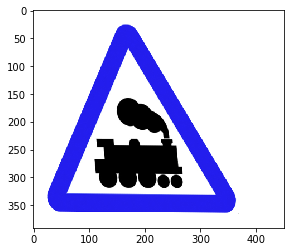

In [ ]:
directory = 'Traffic_Signs_Templates/Processed_Images'
if (not os.path.exists("Traffic_Signs_Templates/Transformed_Images")):
    for path in paths:
        head, tail = ntpath.split(path)    
        title,extension = tail.split('.')
        os.makedirs("Traffic_Signs_Templates/Transformed_Images/"+title)
paths = load_templates(directory)
img_transform(paths)